# Metrics for fundamental matrix calculations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%run calc_adelaide_metrics.py

In [3]:
df = pd.read_csv('adelaide_rmf_metrics.csv')
df.head()

,dataset,rms-mad,mrs-mad,cv28-mad,cvLMS-mad,rms-rmsd,mrs-rmsd,cv28-rmsd,cvLMS-rmsd
0,barrsmith,0.934068,0.934679,0.934678,0.988943,2.267168,2.267442,2.267442,2.566267
1,biscuit,0.741252,0.740618,0.740618,0.818220,1.323534,1.322682,1.322682,1.499619
2,biscuitbook,19.753195,19.927761,19.927762,12.622830,31.657677,31.853234,31.853235,33.135698
3,biscuitbookbox,11.172396,11.203209,11.203209,15.241110,18.495946,18.545027,18.545027,46.405093
4,boardgame,21.901874,21.738514,21.738514,25.331317,66.046171,63.654089,63.654089,77.481137


In [4]:
df.loc[:, 'rms-mad':].describe()

,rms-mad,mrs-mad,cv28-mad,cvLMS-mad,rms-rmsd,mrs-rmsd,cv28-rmsd,cvLMS-rmsd
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,8.902187,9.214056,9.214056,14.389526,19.918204,20.540671,20.540671,41.500354
std,14.493098,15.499965,15.499965,23.355312,33.727523,35.717729,35.717730,72.432154
min,0.231463,0.231633,0.231633,0.408355,0.425984,0.426123,0.426123,0.800090
25%,0.582263,0.582111,0.582111,0.562795,1.334570,1.333795,1.333795,1.497689
50%,1.142910,1.141577,1.141577,0.984593,2.326126,2.322790,2.322790,2.868687
75%,11.497933,11.520235,11.520237,22.808765,19.600175,19.675470,19.675472,69.550111
max,56.014520,63.940440,63.940441,78.162379,118.252473,132.437101,132.437101,318.544766


In [5]:
df['mad-mrs-better'] = df['mrs-mad'] < df['rms-mad']
df['rmsd-mrs-better'] = df['mrs-rmsd'] < df['rms-rmsd']
df.loc[:, 'mad-mrs-better':].mean()

mad-mrs-better     0.605263
rmsd-mrs-better    0.578947
dtype: float64

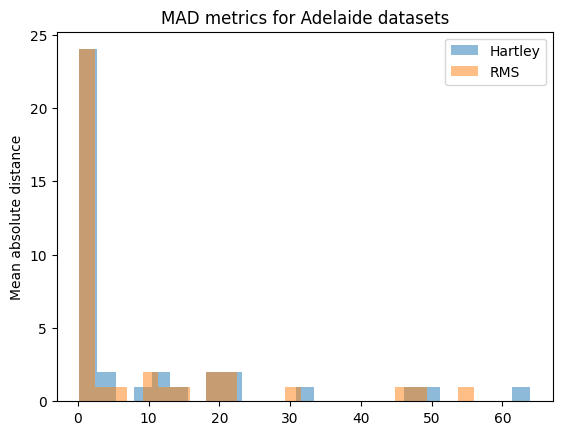

In [6]:
plt.hist(df['mrs-mad'], alpha=0.5, bins=25, label='Hartley')
plt.hist(df['rms-mad'], alpha=0.5, bins=25, label='RMS')
plt.legend()
plt.ylabel('Mean absolute distance')
plt.title('MAD metrics for Adelaide datasets');

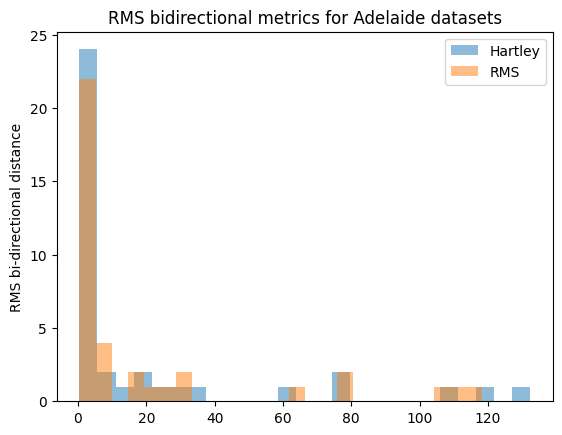

In [7]:
plt.hist(df['mrs-rmsd'], alpha=0.5, bins=25, label='Hartley')
plt.hist(df['rms-rmsd'], alpha=0.5, bins=25, label='RMS')
plt.legend()
plt.ylabel('RMS bi-directional distance')
plt.title('RMS bidirectional metrics for Adelaide datasets');

## Train - test metrics

In [8]:
df = pd.read_csv('adelaide_rmf_tt_metrics.csv')
df.head()

,dataset,rms-mad,mrs-mad,cv28-mad,cvLMS-mad,rms-rmsd,mrs-rmsd,cv28-rmsd,cvLMS-rmsd
0,barrsmith,1.385393,1.388051,1.388051,3.245614,3.440902,3.443627,3.443627,6.717719
1,biscuit,0.744289,0.744172,0.744172,0.806509,1.337416,1.336479,1.336479,1.508597
2,biscuitbook,23.180997,23.361964,23.361965,11.441084,37.260635,37.470825,37.470826,28.102259
3,biscuitbookbox,11.476135,11.493248,11.493248,26.932244,19.076401,19.091199,19.091199,61.479066
4,boardgame,38.287804,37.508449,37.508449,33.664224,1003.624269,372.364437,372.364437,83.682025


In [9]:
df.loc[:, 'rms-mad':].describe()

,rms-mad,mrs-mad,cv28-mad,cvLMS-mad,rms-rmsd,mrs-rmsd,cv28-rmsd,cvLMS-rmsd
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,9.876085,11.203926,11.203927,12.614188,45.804610,31.460821,31.460821,31.771371
std,16.673867,20.692168,20.692168,24.637963,163.519787,70.935753,70.935753,56.632346
min,0.337016,0.337024,0.337024,0.404052,0.638510,0.638522,0.638522,0.760648
25%,0.746081,0.746052,0.746052,0.691720,1.729016,1.727282,1.727282,1.435309
50%,1.384324,1.378658,1.378658,1.142583,2.751803,2.740831,2.740831,3.812132
75%,12.101151,11.980441,11.980441,11.389715,20.025497,19.889058,19.889057,26.478504
max,66.194865,80.858981,80.858981,104.799288,1003.624269,372.364437,372.364437,233.644941
